# **TASK 3:- BUILDING A DECISION TREE CLASSIFIER**

The task here is to build a decision tree classifier to predict whether a patient has diabetes or not based on certain diagnostic measurements.

The dataset used here is Diabetes Dataset from Kaggle.

https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset

**IMPORTING NECESSARY LIBRARIES**

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

**IMPORTING DATA**

In [20]:
data = pd.read_csv('Diabetes Dataset.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


**SEPARATING TARGET VARIABLE (Y) FROM FEATURES (X)**

In [21]:
x = data.drop('Outcome', axis=1) #Features
y = data['Outcome'] #target variable

In [22]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [23]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [24]:
# Preprocess Categorical Data (one-hot encoding)
x_encoded = pd.get_dummies(x, drop_first=True)
x_encoded

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


Since there are no categorical variables in the dataset, there is no change in the data. We can ignore the above step in this case.

In [25]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [26]:
# Initialize the Decision Tree classifier
dt_clf = DecisionTreeClassifier(random_state=42)

# Train the above classifier
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [27]:
# Making Predictions
y_pred = dt_clf.predict(x_test)

In [28]:
# Making sure if x_train and x_test have the same features
print("Number of features in x_train:", len(x_train.columns))
print("Number of features in x_test:", len(x_test.columns))
print("Feature names:", x_train.columns)

Number of features in x_train: 8
Number of features in x_test: 8
Feature names: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


In [29]:
# Evaluating the Model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
clf_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}\n")

print("Confusion Matrix:")
print(conf_matrix)
print()

print("Classification Report:")
print(clf_rep)

Accuracy: 0.75

Confusion Matrix:
[[75 24]
 [15 40]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



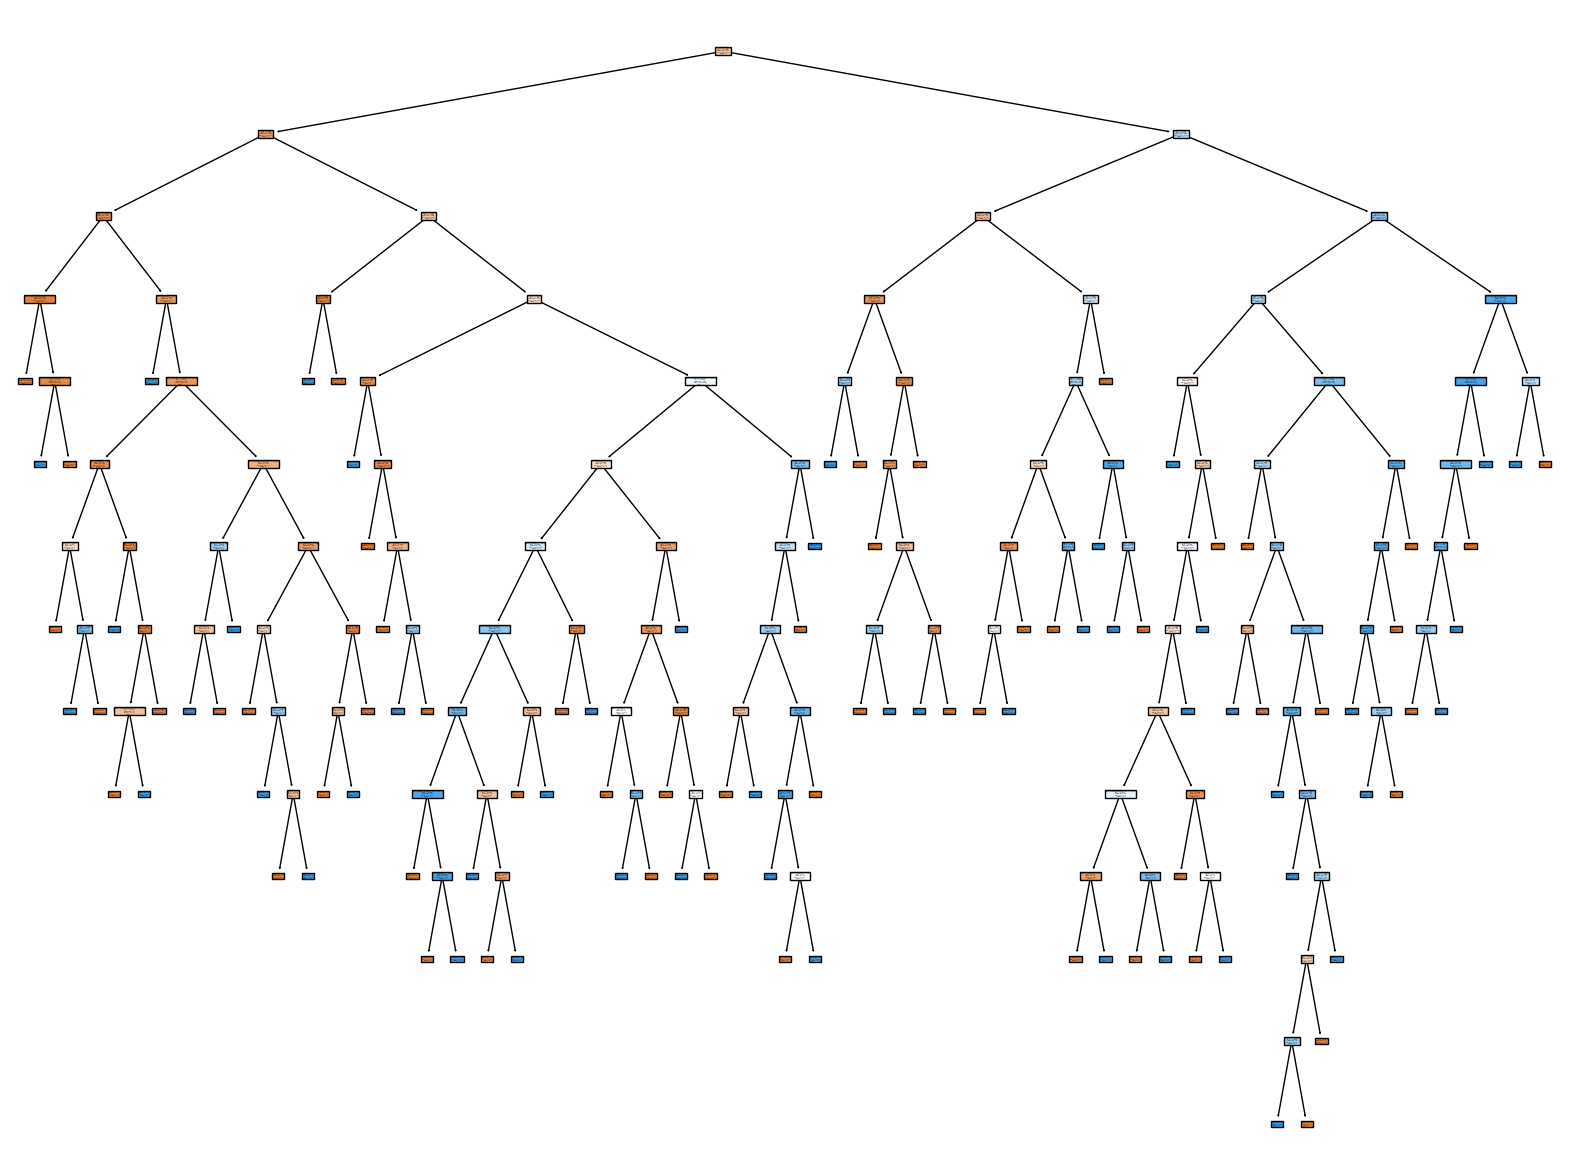

In [41]:
# Visualize the Decision Tree

# Assuming dt_clf is your trained decision tree classifier, x is your feature matrix, and df['Outcome'] is your target variable
features = list(x.columns)

# Convert numeric labels to strings
classes = list(map(str, data['Outcome']))

plt.figure(figsize=(20,15))
plot_tree(dt_clf, filled=True, feature_names=features, class_names=classes)
plt.show()

# ***Inference:-***

The model has an overall accuracy of ***75%***, which means it has done a reasonable performance.

**Confusion Matrix:**

True Positives (TP): 40

True Negatives (TN): 75

False Positives (FP): 24

False Negatives (FN): 15

Class 0 (No Diabetes) has a higher precision, recall, and F1-Score compared to Class 1 (Diabetes). This indicates that the model is better at predicting instances *without Diabetes*.*italicized text*